In [1]:
import pandas as pd
import os
import sys

project_root = os.path.dirname(os.path.dirname(os.path.abspath('__file__')))
sys.path.append(project_root)


from utils.cmod5n import cmod5n_forward, cmod5n_inverse
from utils.functions import *

import xarray as xr
from glob import glob

In [2]:
ds = xr.open_dataset(glob("../processed_data/Sentinel1/WV/2020/*.nc")[0])

In [3]:
df1 = pd.read_parquet("../processed_data/wv1_complete.parquet")
df2 = pd.read_parquet("../processed_data/wv2_complete.parquet")

df1 = create_phi_bins_columns(df1)
df2 = create_phi_bins_columns(df2)

df1r = pd.read_parquet("../results/wv1_results_updated.parquet")
df2r = pd.read_parquet("../results/wv2_results_updated.parquet")

df1w = pd.read_parquet("../results/wv1_wind_results.parquet")
df2w = pd.read_parquet("../results/wv2_wind_results.parquet")

df1r["renamed_filename"] = df1r.sar_filepath.apply(lambda x: x.split("/")[-1])
df2r["renamed_filename"] = df2r.sar_filepath.apply(lambda x: x.split("/")[-1])

df1w["renamed_filename"] = df1w.sar_filepath.apply(lambda x: x.split("/")[-1])
df2w["renamed_filename"] = df2w.sar_filepath.apply(lambda x: x.split("/")[-1])

idxmax = df1w.k_values_wind.apply(lambda x: len(x)).argmax()
max_len = df1w.k_values_wind.apply(lambda x: len(x)).max()

df1r = pad_arrays_to_max_length(df1r, 'radial_psd', max_len)
df2r = pad_arrays_to_max_length(df2r, 'radial_psd', max_len)

df1w = pad_arrays_to_max_length(df1w, 'radial_wind_psd', max_len)
df2w = pad_arrays_to_max_length(df2w, 'radial_wind_psd', max_len)

In [4]:
k_values = get_k_values(df1r, "k_values")

In [5]:
k_values

array([0.        , 0.0009009 , 0.0018018 , 0.0027027 , 0.0036036 ,
       0.0045045 , 0.00540541, 0.00630631, 0.00720721, 0.00810811,
       0.00900901, 0.00990991, 0.01081081, 0.01171171, 0.01261261,
       0.01351351, 0.01441441, 0.01531532, 0.01621622, 0.01711712,
       0.01801802, 0.01891892, 0.01981982, 0.02072072, 0.02162162,
       0.02252252, 0.02342342, 0.02432432, 0.02522523, 0.02612613,
       0.02702703, 0.02792793, 0.02882883, 0.02972973, 0.03063063,
       0.03153153, 0.03243243, 0.03333333, 0.03423423, 0.03513514,
       0.03603604, 0.03693694, 0.03783784, 0.03873874, 0.03963964,
       0.04054054, 0.04144144, 0.04234234, 0.04324324, 0.04414414,
       0.04504505, 0.04594595, 0.04684685, 0.04774775, 0.04864865,
       0.04954955, 0.05045045, 0.05135135, 0.05225225, 0.05315315,
       0.05405405, 0.05495495, 0.05585586, 0.05675676, 0.05765766,
       0.05855856, 0.05945946, 0.06036036, 0.06126126, 0.06216216,
       0.06306306, 0.06396396, 0.06486486, 0.06576577, 0.06666

In [6]:
df1_rg, df1r_rg, df1w_rg = create_dfs_from_phi_interval('[-90, -89)', df1, df1r, df1w)
df2_rg, df2r_rg, df2w_rg = create_dfs_from_phi_interval('[-90, -89)', df2, df2r, df2w)

Performing block bootstrap with 14 samples, block size 3, and 1000 replicates


100%|██████████| 1000/1000 [00:00<00:00, 30482.97it/s]


Performing block bootstrap with 21 samples, block size 4, and 1000 replicates


100%|██████████| 1000/1000 [00:00<00:00, 22750.87it/s]


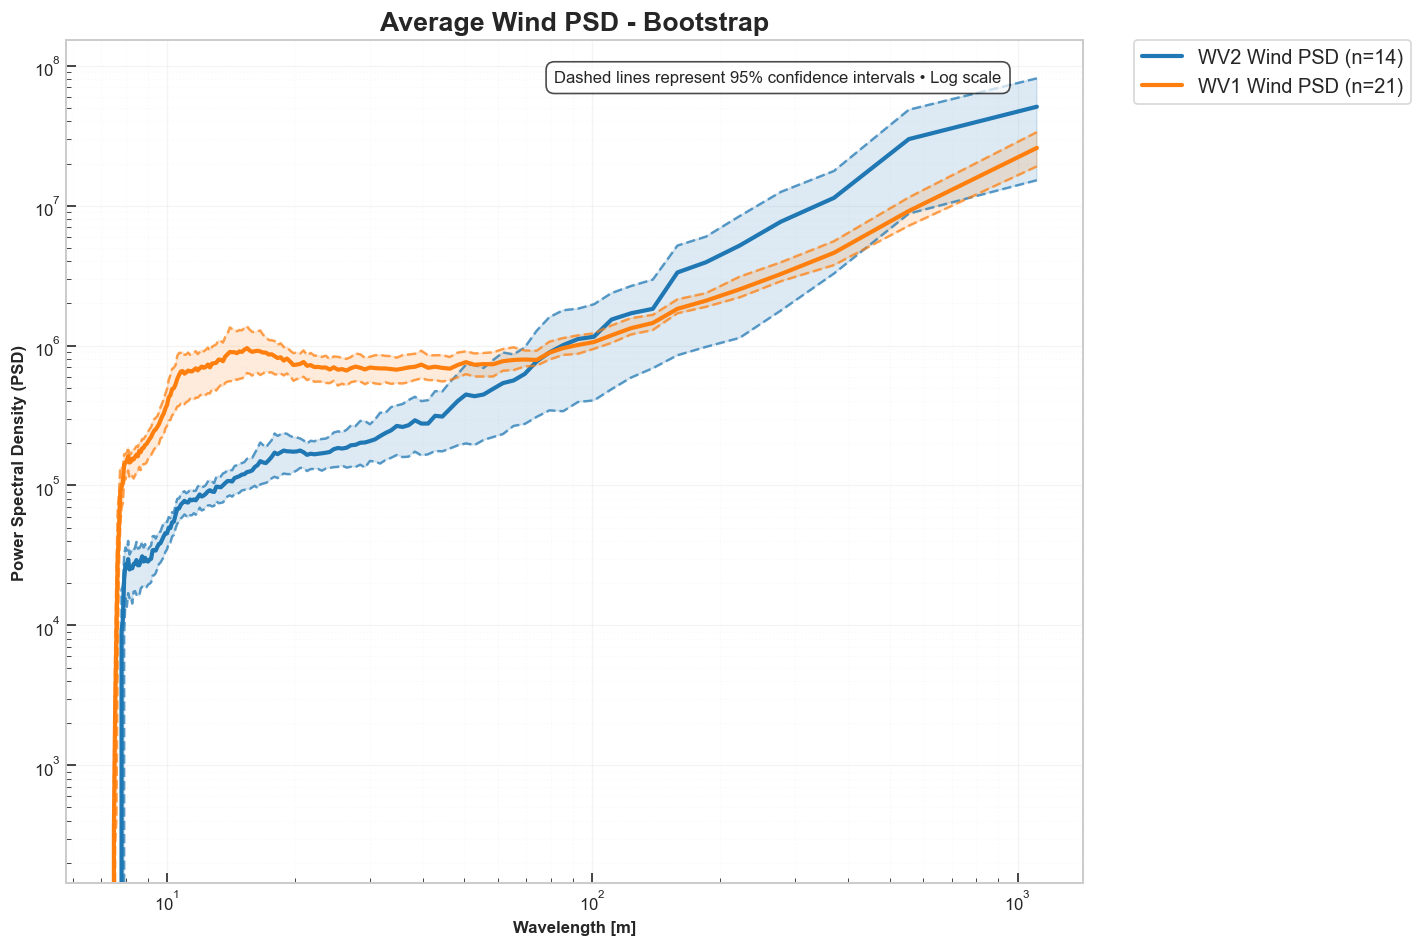

In [7]:
plot_avg_spectral_density(k_values, [df2w_rg, df1w_rg], ["WV2 Wind PSD", "WV1 Wind PSD"],
                          "Average Wind PSD", 
                        #   x_range=(0., y_range=(1, 100e7), 
                          use_log_scale=True, wavelength=True, bootstrap=True);

In [8]:
print(k_values)

[0.         0.0009009  0.0018018  0.0027027  0.0036036  0.0045045
 0.00540541 0.00630631 0.00720721 0.00810811 0.00900901 0.00990991
 0.01081081 0.01171171 0.01261261 0.01351351 0.01441441 0.01531532
 0.01621622 0.01711712 0.01801802 0.01891892 0.01981982 0.02072072
 0.02162162 0.02252252 0.02342342 0.02432432 0.02522523 0.02612613
 0.02702703 0.02792793 0.02882883 0.02972973 0.03063063 0.03153153
 0.03243243 0.03333333 0.03423423 0.03513514 0.03603604 0.03693694
 0.03783784 0.03873874 0.03963964 0.04054054 0.04144144 0.04234234
 0.04324324 0.04414414 0.04504505 0.04594595 0.04684685 0.04774775
 0.04864865 0.04954955 0.05045045 0.05135135 0.05225225 0.05315315
 0.05405405 0.05495495 0.05585586 0.05675676 0.05765766 0.05855856
 0.05945946 0.06036036 0.06126126 0.06216216 0.06306306 0.06396396
 0.06486486 0.06576577 0.06666667 0.06756757 0.06846847 0.06936937
 0.07027027 0.07117117 0.07207207 0.07297297 0.07387387 0.07477477
 0.07567568 0.07657658 0.07747748 0.07837838 0.07927928 0.08018

In [9]:
lambda_values = 1 / k_values
lambda_values

array([          inf, 1110.        ,  555.        ,  370.        ,
        277.5       ,  222.        ,  185.        ,  158.57142857,
        138.75      ,  123.33333333,  111.        ,  100.90909091,
         92.5       ,   85.38461538,   79.28571429,   74.        ,
         69.375     ,   65.29411765,   61.66666667,   58.42105263,
         55.5       ,   52.85714286,   50.45454545,   48.26086957,
         46.25      ,   44.4       ,   42.69230769,   41.11111111,
         39.64285714,   38.27586207,   37.        ,   35.80645161,
         34.6875    ,   33.63636364,   32.64705882,   31.71428571,
         30.83333333,   30.        ,   29.21052632,   28.46153846,
         27.75      ,   27.07317073,   26.42857143,   25.81395349,
         25.22727273,   24.66666667,   24.13043478,   23.61702128,
         23.125     ,   22.65306122,   22.2       ,   21.76470588,
         21.34615385,   20.94339623,   20.55555556,   20.18181818,
         19.82142857,   19.47368421,   19.13793103,   18.81355

In [10]:
# d = compute_directional_differences(df1, df2, df1r, df2r, df1w, df2w, k_values, phi_res=1)
# plot_directional_differences(d, k_values, plot_type='wavelength', cmap='RdBu_r', 
#                              max_wavelength=100, vmin=-1e6, vmax=1e6)

Performing block bootstrap with 1040 samples, block size 32, and 1000 replicates


100%|██████████| 1000/1000 [00:01<00:00, 764.42it/s]


Performing block bootstrap with 1132 samples, block size 33, and 1000 replicates


100%|██████████| 1000/1000 [00:01<00:00, 636.46it/s]


Performing block bootstrap with 418 samples, block size 20, and 1000 replicates


100%|██████████| 1000/1000 [00:00<00:00, 4546.61it/s]


Performing block bootstrap with 405 samples, block size 20, and 1000 replicates


100%|██████████| 1000/1000 [00:00<00:00, 4786.75it/s]


Performing block bootstrap with 254 samples, block size 15, and 1000 replicates


100%|██████████| 1000/1000 [00:00<00:00, 7948.38it/s]


Performing block bootstrap with 255 samples, block size 15, and 1000 replicates


100%|██████████| 1000/1000 [00:00<00:00, 7707.85it/s]


Performing block bootstrap with 237 samples, block size 15, and 1000 replicates


100%|██████████| 1000/1000 [00:00<00:00, 8065.47it/s]


Performing block bootstrap with 259 samples, block size 16, and 1000 replicates


100%|██████████| 1000/1000 [00:00<00:00, 7247.03it/s]


Performing block bootstrap with 407 samples, block size 20, and 1000 replicates


100%|██████████| 1000/1000 [00:00<00:00, 5064.00it/s]


Performing block bootstrap with 446 samples, block size 21, and 1000 replicates


100%|██████████| 1000/1000 [00:00<00:00, 4622.97it/s]


Performing block bootstrap with 1369 samples, block size 37, and 1000 replicates


100%|██████████| 1000/1000 [00:01<00:00, 675.73it/s]


Performing block bootstrap with 1448 samples, block size 38, and 1000 replicates


100%|██████████| 1000/1000 [00:01<00:00, 659.80it/s]


Performing block bootstrap with 2278 samples, block size 47, and 1000 replicates


100%|██████████| 1000/1000 [00:02<00:00, 408.41it/s]


Performing block bootstrap with 2381 samples, block size 48, and 1000 replicates


100%|██████████| 1000/1000 [00:02<00:00, 390.63it/s]


Performing block bootstrap with 1338 samples, block size 36, and 1000 replicates


100%|██████████| 1000/1000 [00:01<00:00, 705.10it/s]


Performing block bootstrap with 1262 samples, block size 35, and 1000 replicates


100%|██████████| 1000/1000 [00:01<00:00, 691.25it/s]


Performing block bootstrap with 541 samples, block size 23, and 1000 replicates


100%|██████████| 1000/1000 [00:00<00:00, 3753.28it/s]


Performing block bootstrap with 518 samples, block size 22, and 1000 replicates


100%|██████████| 1000/1000 [00:00<00:00, 4026.04it/s]


Performing block bootstrap with 641 samples, block size 25, and 1000 replicates


100%|██████████| 1000/1000 [00:00<00:00, 3179.16it/s]


Performing block bootstrap with 542 samples, block size 23, and 1000 replicates


100%|██████████| 1000/1000 [00:00<00:00, 3768.60it/s]


Performing block bootstrap with 1848 samples, block size 42, and 1000 replicates


100%|██████████| 1000/1000 [00:02<00:00, 490.82it/s]


Performing block bootstrap with 1781 samples, block size 42, and 1000 replicates


100%|██████████| 1000/1000 [00:02<00:00, 482.28it/s]


Performing block bootstrap with 2218 samples, block size 47, and 1000 replicates


100%|██████████| 1000/1000 [00:02<00:00, 392.84it/s]


Performing block bootstrap with 2171 samples, block size 46, and 1000 replicates


100%|██████████| 1000/1000 [00:02<00:00, 417.18it/s]


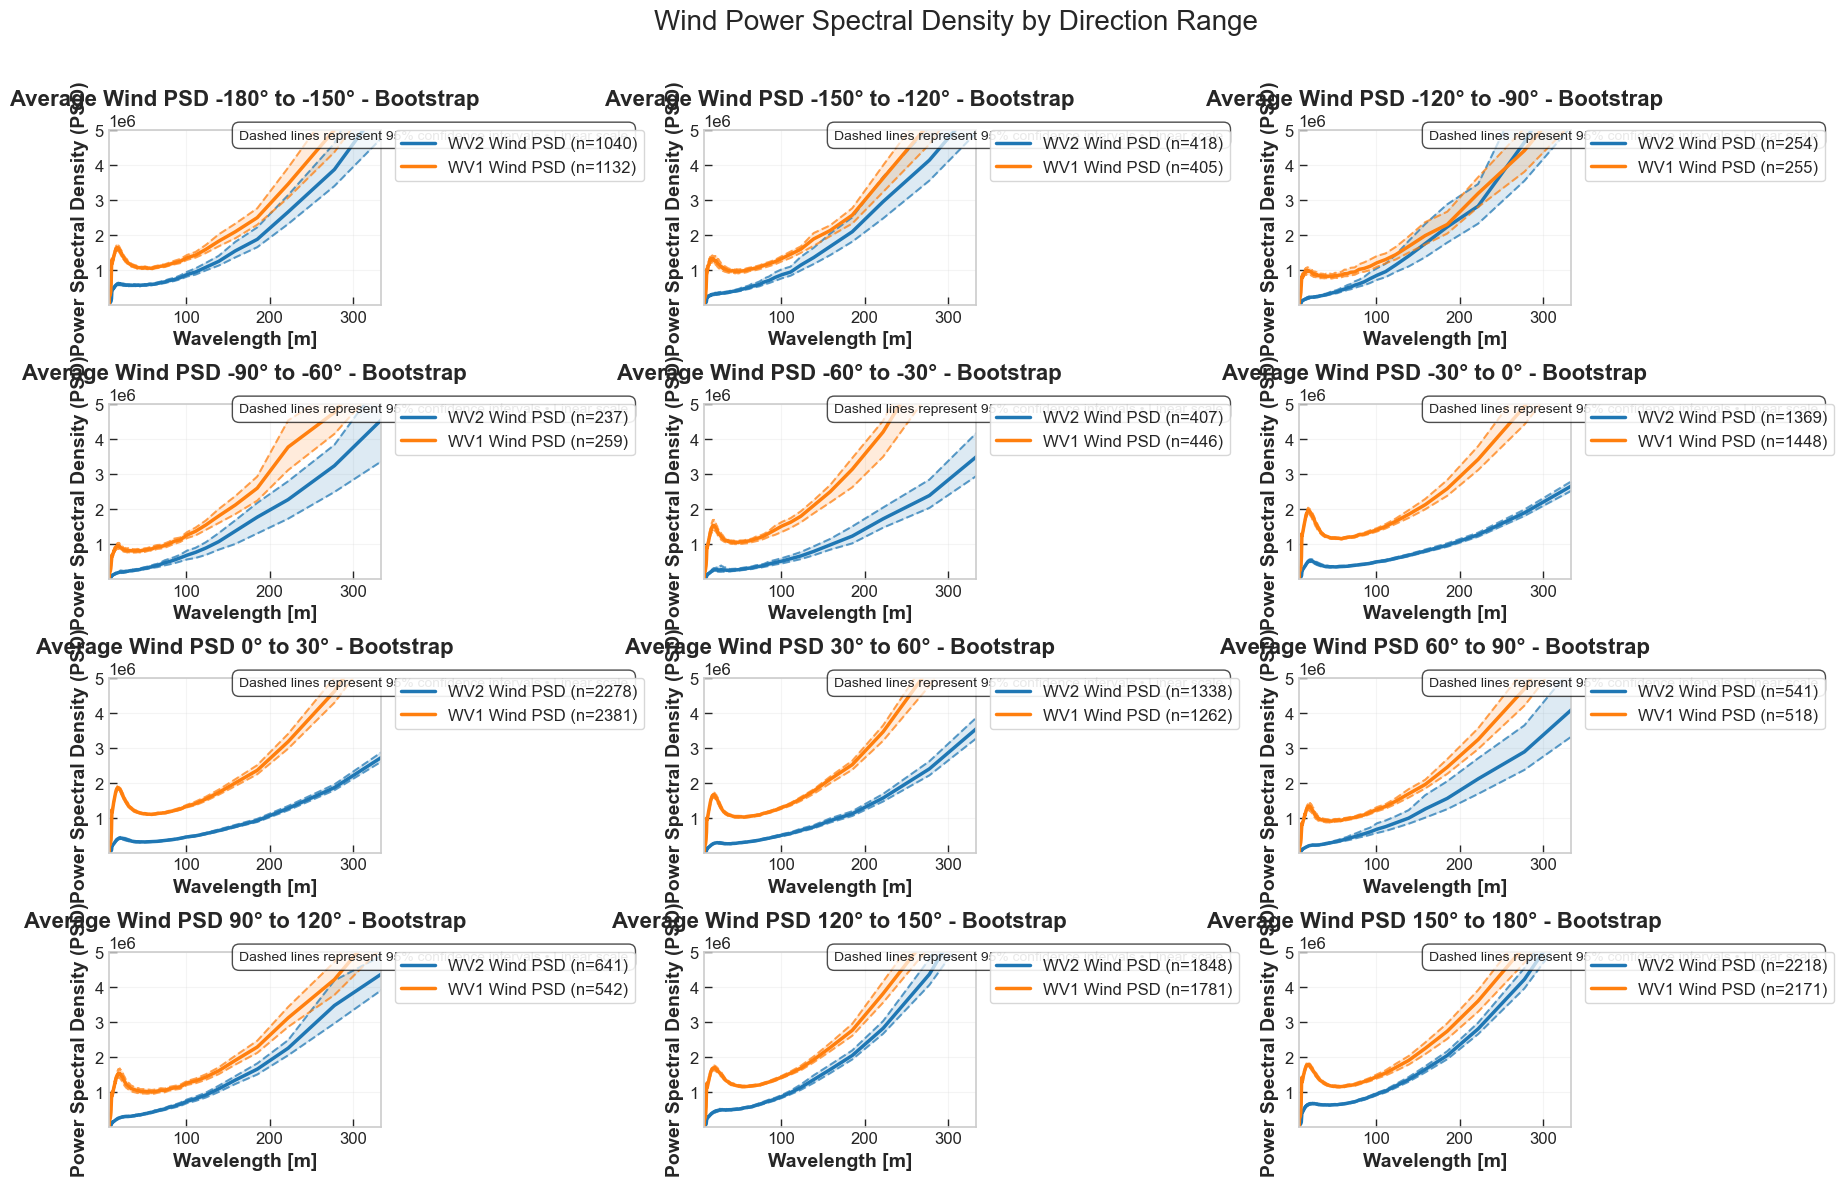

In [11]:
intervals = np.arange(-180, 181, 30)

# Create the figure and axes
fig, axes = plt.subplots(4, 3, figsize=(18, 12))

# Flatten the 2D array of axes
flat_axes = axes.flatten()

for i in range(len(intervals)-1):
    a = intervals[i]
    b = intervals[i+1]
    
    # Skip if we've run out of axes
    if i >= len(flat_axes):
        print(f"Warning: Not enough axes for interval {a} to {b}")
        continue
        
    # Get the current axis
    current_ax = flat_axes[i]
    
    # Construct filtered DataFrames for the current interval
    df1_filtered, df1r_filtered, df1w_filtered, df2_filtered, df2r_filtered, df2w_filtered = construct_df(a, b, df1, df1r, df1w, df2, df2r, df2w)
    df1_filtered = filter_similar_atmospheric_conditions(df1_filtered, L_range=(-1e6, -1000))
    df2_filtered = filter_similar_atmospheric_conditions(df2_filtered, L_range=(-1e6, -1000))

    df1r_filtered = df1r_filtered[df1r_filtered["renamed_filename"].isin(df1_filtered["renamed_filename"])]
    df2r_filtered = df2r_filtered[df2r_filtered["renamed_filename"].isin(df2_filtered["renamed_filename"])]

    df1w_filtered = df1w_filtered[df1w_filtered["renamed_filename"].isin(df1_filtered["renamed_filename"])]
    df2w_filtered = df2w_filtered[df2w_filtered["renamed_filename"].isin(df2_filtered["renamed_filename"])]

    # Plot on the current axis
    _, _ = plot_avg_spectral_density(k_values, [df2w_filtered, df1w_filtered],
                              ["WV2 Wind PSD", "WV1 Wind PSD"],
                              f"Average Wind PSD {a}° to {b}°", 
                              x_range=(0.003, 0.15), y_range=(1, 0.5e7), 
                              use_log_scale=False, wavelength=True, bootstrap=True,
                              ax=current_ax)  

# Hide any unused axes
for j in range(i+1, len(flat_axes)):
    flat_axes[j].set_visible(False)

# Add a common title for the entire figure
fig.suptitle('Wind Power Spectral Density by Direction Range', fontsize=20, y=0.98)

# Adjust spacing between subplots
plt.tight_layout(rect=[0, 0, 1, 0.96])  # The rect parameter reserves space for the suptitle

# Show the figure
plt.show()

In [12]:
df1_m180_m150, df1r_m180_m150, df1w_m180_m150, df2_m180_m150, df2r_m180_m150, df2w_m180_m150 = construct_df(-180, -150, df1, df1r, df1w, df2, df2r, df2w)
df1_m150_m120, df1r_m150_m120, df1w_m150_m120, df2_m150_m120, df2r_m150_m120, df2w_m150_m120 = construct_df(-150, -120, df1, df1r, df1w, df2, df2r, df2w)
df1_m120_m90, df1r_m120_m90, df1w_m120_m90, df2_m120_m90, df2r_m120_m90, df2w_m120_m90 = construct_df(-120, -90, df1, df1r, df1w, df2, df2r, df2w)
df1_m90_m60, df1r_m90_m60, df1w_m90_m60, df2_m90_m60, df2r_m90_m60, df2w_m90_m60 = construct_df(-90, -60, df1, df1r, df1w, df2, df2r, df2w)
df1_m60_m30, df1r_m60_m30, df1w_m60_m30, df2_m60_m30, df2r_m60_m30, df2w_m60_m30 = construct_df(-60, -30, df1, df1r, df1w, df2, df2r, df2w)
df1_m30_0, df1r_m30_0, df1w_m30_0, df2_m30_0, df2r_m30_0, df2w_m30_0 = construct_df(-30, 0, df1, df1r, df1w, df2, df2r, df2w)
df1_0_30, df1r_0_30, df1w_0_30, df2_0_30, df2r_0_30, df2w_0_30 = construct_df(0, 30, df1, df1r, df1w, df2, df2r, df2w)
df1_30_60, df1r_30_60, df1w_30_60, df2_30_60, df2r_30_60, df2w_30_60 = construct_df(30, 60, df1, df1r, df1w, df2, df2r, df2w)
df1_60_90, df1r_60_90, df1w_60_90, df2_60_90, df2r_60_90, df2w_60_90 = construct_df(60, 90, df1, df1r, df1w, df2, df2r, df2w)
df1_90_120, df1r_90_120, df1w_90_120, df2_90_120, df2r_90_120, df2w_90_120 = construct_df(90, 120, df1, df1r, df1w, df2, df2r, df2w)
df1_120_150, df1r_120_150, df1w_120_150, df2_120_150, df2r_120_150, df2w_120_150 = construct_df(120, 150, df1, df1r, df1w, df2, df2r, df2w)
df1_150_180, df1r_150_180, df1w_150_180, df2_150_180, df2r_150_180, df2w_150_180 = construct_df(150, 180, df1, df1r, df1w, df2, df2r, df2w)

In [13]:
df1_reconstructed = pd.concat([df1_m180_m150, df1_m150_m120, df1_m120_m90, df1_m90_m60, df1_m60_m30, df1_m30_0,
                               df1_0_30, df1_30_60, df1_60_90, df1_90_120, df1_120_150, df1_150_180], ignore_index=True)

df2_reconstructed = pd.concat([df2_m180_m150, df2_m150_m120, df2_m120_m90, df2_m90_m60, df2_m60_m30, df2_m30_0,
                                 df2_0_30, df2_30_60, df2_60_90, df2_90_120, df2_120_150, df2_150_180], ignore_index=True)

Number of r values after filtering: 91
Min/max r after filtering: 46.81, 118.21


(<Figure size 1200x1000 with 2 Axes>,
 <PolarAxes: title={'center': 'Directional Differences - Filtered - L_range (-1000000.0, -1000)'}>)

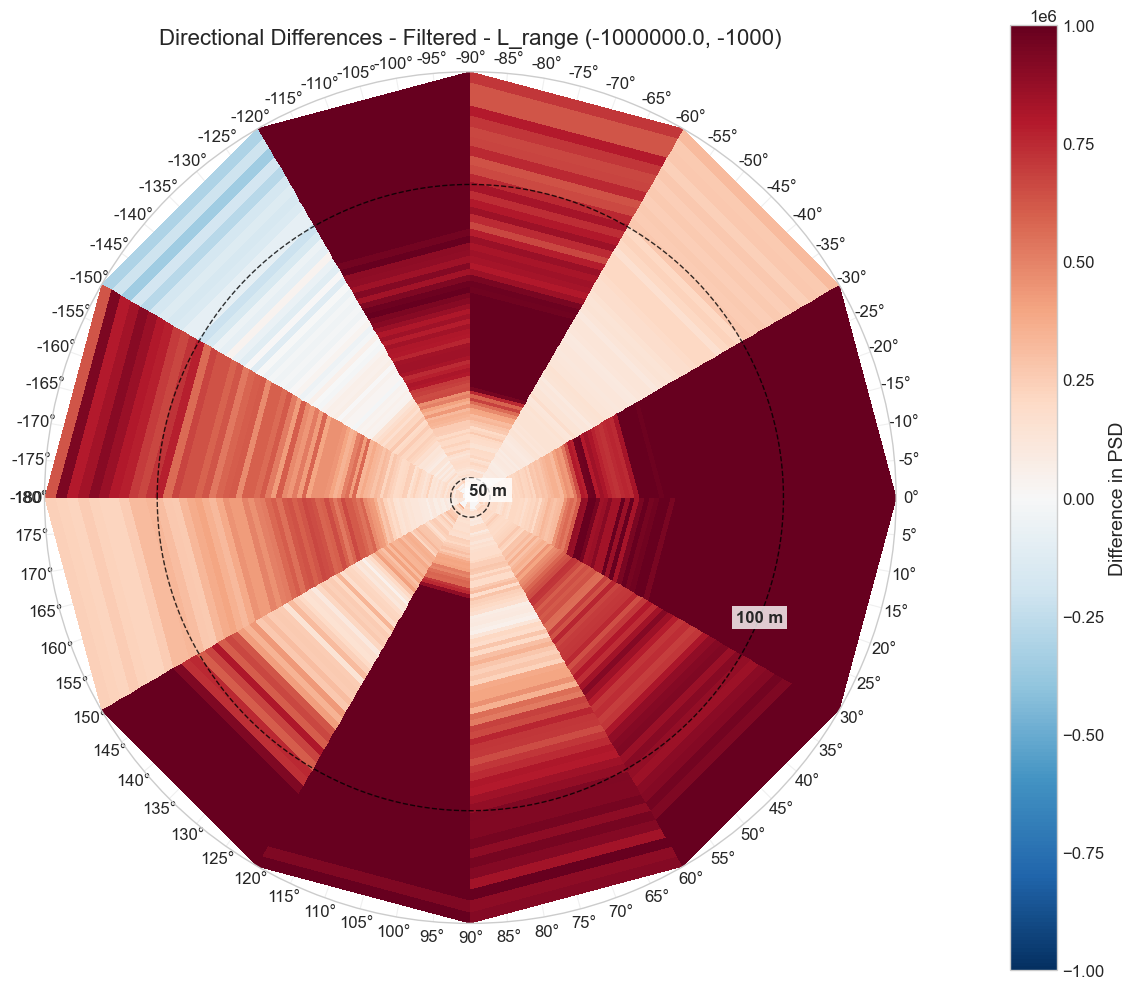

In [14]:
filtered_df1 = filter_similar_atmospheric_conditions(df1_reconstructed, L_range=(-1e6, -1000))
filtered_df2 = filter_similar_atmospheric_conditions(df2_reconstructed, L_range=(-1e6, -1000))
filtered_df1r = df1r[df1r["renamed_filename"].isin(filtered_df1["renamed_filename"])]
filtered_df2r = df2r[df2r["renamed_filename"].isin(filtered_df2["renamed_filename"])]
filtered_df1w = df1w[df1w["renamed_filename"].isin(filtered_df1["renamed_filename"])]
filtered_df2w = df2w[df2w["renamed_filename"].isin(filtered_df2["renamed_filename"])]

d = compute_directional_differences(filtered_df1, filtered_df2,
                                    filtered_df1r, filtered_df2r, 
                                    filtered_df1w, filtered_df2w, 
                                    k_values=k_values, phi_res=30)

plot_directional_differences(d, k_values, plot_type='wavelength', cmap='RdBu_r',
                                max_wavelength=120, vmin=-1e6, vmax=1e6,
                                title=f"Directional Differences - Filtered - L_range {(-1e6, -1000)}")

In [15]:
# # wspd_range = (18, 19)
# L_ranges = [(-1e6, -1000), (-1000, -500), (-500, 0)]
# ds = []
# for L_range in L_ranges:
#     filtered_df1 = filter_similar_atmospheric_conditions(df1, L_range=L_range)
#     filtered_df2 = filter_similar_atmospheric_conditions(df2, L_range=L_range)

#     filtered_df1r = df1r[df1r['renamed_filename'].isin(filtered_df1['renamed_filename'])]
#     filtered_df2r = df2r[df2r['renamed_filename'].isin(filtered_df2['renamed_filename'])]

#     filtered_df1w = df1w[df1w['renamed_filename'].isin(filtered_df1['renamed_filename'])]
#     filtered_df2w = df2w[df2w['renamed_filename'].isin(filtered_df2['renamed_filename'])]

#     filtered_df1_rg_uw = filter_similar_atmospheric_conditions(df1_rg_uw, L_range=L_range)
#     filtered_df2_rg_uw = filter_similar_atmospheric_conditions(df2_rg_uw, L_range=L_range)
#     filtered_df1r_rg_uw = df1r_rg_uw[df1r_rg_uw['renamed_filename'].isin(filtered_df1_rg_uw['renamed_filename'])]
#     filtered_df2r_rg_uw = df2r_rg_uw[df2r_rg_uw['renamed_filename'].isin(filtered_df2_rg_uw['renamed_filename'])]
#     filtered_df1w_rg_uw = df1w_rg_uw[df1w_rg_uw['renamed_filename'].isin(filtered_df1_rg_uw['renamed_filename'])]
#     filtered_df2w_rg_uw = df2w_rg_uw[df2w_rg_uw['renamed_filename'].isin(filtered_df2_rg_uw['renamed_filename'])]

#     filtered_df1_rg_dw = filter_similar_atmospheric_conditions(df1_rg_dw, L_range=L_range)
#     filtered_df2_rg_dw = filter_similar_atmospheric_conditions(df2_rg_dw, L_range=L_range)
#     filtered_df1r_rg_dw = df1r_rg_dw[df1r_rg_dw['renamed_filename'].isin(filtered_df1_rg_dw['renamed_filename'])]
#     filtered_df2r_rg_dw = df2r_rg_dw[df2r_rg_dw['renamed_filename'].isin(filtered_df2_rg_dw['renamed_filename'])]
#     filtered_df1w_rg_dw = df1w_rg_dw[df1w_rg_dw['renamed_filename'].isin(filtered_df1_rg_dw['renamed_filename'])]
#     filtered_df2w_rg_dw = df2w_rg_dw[df2w_rg_dw['renamed_filename'].isin(filtered_df2_rg_dw['renamed_filename'])]

#     filtered_df1_az_lr = filter_similar_atmospheric_conditions(df1_az_lr, L_range=L_range)
#     filtered_df2_az_lr = filter_similar_atmospheric_conditions(df2_az_lr, L_range=L_range)
#     filtered_df1r_az_lr = df1r_az_lr[df1r_az_lr['renamed_filename'].isin(filtered_df1_az_lr['renamed_filename'])]
#     filtered_df2r_az_lr = df2r_az_lr[df2r_az_lr['renamed_filename'].isin(filtered_df2_az_lr['renamed_filename'])]
#     filtered_df1w_az_lr = df1w_az_lr[df1w_az_lr['renamed_filename'].isin(filtered_df1_az_lr['renamed_filename'])]
#     filtered_df2w_az_lr = df2w_az_lr[df2w_az_lr['renamed_filename'].isin(filtered_df2_az_lr['renamed_filename'])]

#     filtered_df1_az_rl = filter_similar_atmospheric_conditions(df1_az_rl, L_range=L_range)
#     filtered_df2_az_rl = filter_similar_atmospheric_conditions(df2_az_rl, L_range=L_range)
#     filtered_df1r_az_rl = df1r_az_rl[df1r_az_rl['renamed_filename'].isin(filtered_df1_az_rl['renamed_filename'])]
#     filtered_df2r_az_rl = df2r_az_rl[df2r_az_rl['renamed_filename'].isin(filtered_df2_az_rl['renamed_filename'])]
#     filtered_df1w_az_rl = df1w_az_rl[df1w_az_rl['renamed_filename'].isin(filtered_df1_az_rl['renamed_filename'])]
#     filtered_df2w_az_rl = df2w_az_rl[df2w_az_rl['renamed_filename'].isin(filtered_df2_az_rl['renamed_filename'])]

#     plot_avg_spectral_density(k_values, [filtered_df2w_rg_uw, filtered_df1w_rg_uw], ["WV2 Wind PSD", "WV1 Wind PSD"],
#                             f"Average Wind PSD - Filtered - L_range {L_range} - rg uw", 
#                             x_range=(0.005, 0.15), y_range=(1, 0.2e7), 
#                             use_log_scale=False, wavelength=True);

    
#     plot_avg_spectral_density(k_values, [filtered_df2w_rg_dw, filtered_df1w_rg_dw], ["WV2 Wind PSD", "WV1 Wind PSD"],
#                             f"Average Wind PSD - Filtered - L_range {L_range} - rg dw",
#                             x_range=(0.005, 0.15), y_range=(1, 0.2e7),
#                             use_log_scale=False, wavelength=True);
    
#     plot_avg_spectral_density(k_values, [filtered_df2w_az_lr, filtered_df1w_az_lr], ["WV2 Wind PSD", "WV1 Wind PSD"],
#                             f"Average Wind PSD - Filtered - L_range {L_range} - az lr",
#                             x_range=(0.005, 0.15), y_range=(1, 0.2e7),
#                             use_log_scale=False, wavelength=True);
    
#     plot_avg_spectral_density(k_values, [filtered_df2w_az_rl, filtered_df1w_az_rl], ["WV2 Wind PSD", "WV1 Wind PSD"],
#                             f"Average Wind PSD - Filtered - L_range {L_range} - az rl",
#                             x_range=(0.005, 0.15), y_range=(1, 0.2e7),
#                             use_log_scale=False, wavelength=True);

#     d = compute_directional_differences(filtered_df1, filtered_df2,
#                                         filtered_df1r, filtered_df2r, 
#                                         filtered_df1w, filtered_df2w, 
#                                         k_values=k_values, phi_res=5)
    
#     plot_directional_differences(d, k_values, plot_type='wavelength', cmap='RdBu_r',
#                                  max_wavelength=120, vmin=-1e6, vmax=1e6,
#                                  title=f"Directional Differences - Filtered - L_range {L_range}")

In [16]:
# d = compute_directional_differences(df1, df2, df1r, df2r, df1w, df2w, k_values, phi_res=5)

In [17]:
# plot_directional_differences(d, k_values, plot_type='wavelength', cmap='RdBu_r', 
#                              max_wavelength=100, vmin=-1e6, vmax=1e6)